In [1]:
import os
import cv2
import numpy as np
import hyperspy.api as hs

In [2]:
def mark_cross(img):
    # Takes 512x512 pix image as input and returns image with removed bright cross
    
    img[255:257, :] = np.array(( 0.5*(img[254, :] + img[257, :]), 0.5*(img[254, :] + img[257, :])))
    img[:, 255:257] = np.array((0.5*(img[:,254] + img[:,257]), 0.5*(img[:,254] + img[:,257]))).T
    return img

def removeUntrustedRect(files, output_folder):
    # files: path to files to be processed 
    # output_folder: path to where output files should be saved to

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Iterate through each file in the folder
    for filename in sorted(os.listdir(files)):
        if filename.endswith('.tiff'):  
            # Load the image
            img = cv2.imread(os.path.join(files, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Remove untrusted rectangle
                modified_img = mark_cross(img)
                output_path = os.path.join(output_folder, filename)
                # Write new file to folder
                cv2.imwrite(output_path, modified_img)
            

In [4]:
path = 'D:/Aurora/Master data/fra prosjekt/231016_3DED_BestDatasets/Best_of_GaSb/cRED_120cm_80kV_GaSbParticle1_1/tiff'
removeUntrustedRect(path, path+'/new')

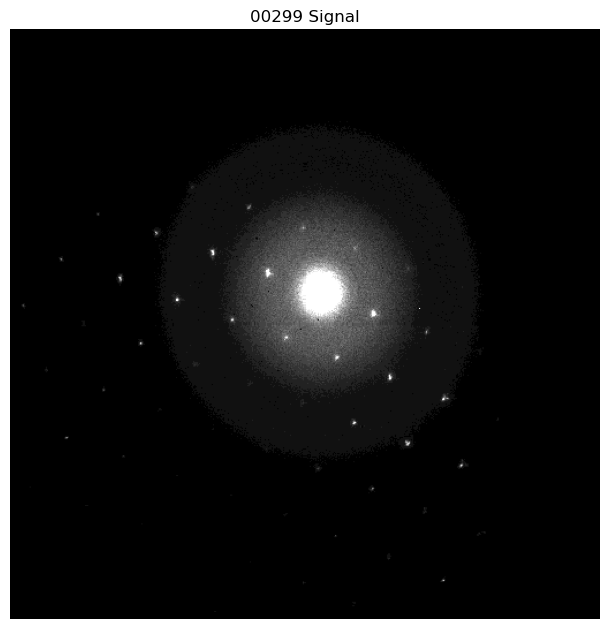

In [5]:
# Plott processed frame to see whether cross is removed or not
im = hs.load(path+'/new/00299.tiff',lazy=False)
im.plot(scalebar=False, axes_off=True, colorbar=False)

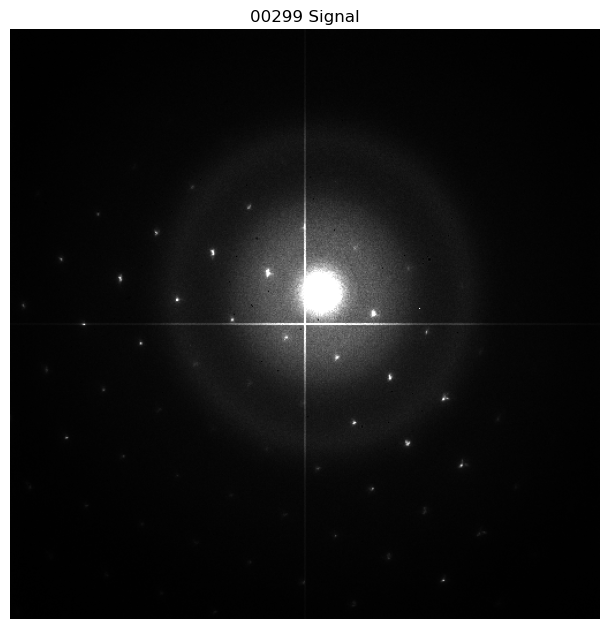

In [6]:
# Compare to original image
im = hs.load(path+'/00299.tiff',lazy=False)
im.plot(scalebar=False, axes_off=True, colorbar=False)